In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("insurance_data.csv")

In [4]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


Text(0.5, 0, 'age')

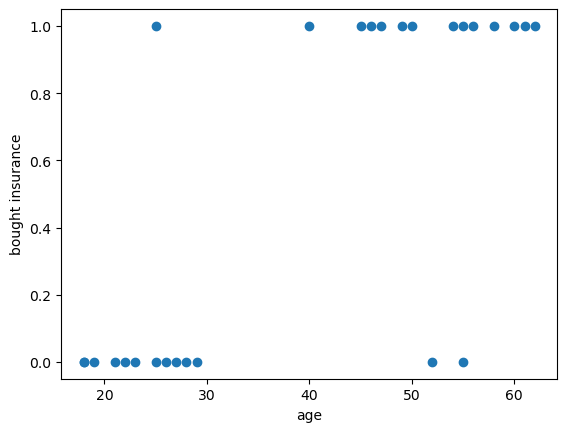

In [5]:
plt.scatter(df.age,df.bought_insurance)
plt.ylabel('bought insurance')
plt.xlabel('age')

In [6]:
df.shape


(27, 2)

where: 27 is the no of rows,2 is the columns

In [7]:
import sklearn
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(df['age'],df['bought_insurance'],test_size=0.2,random_state=10)

25 rows 
20% of 27 = 5.4 = 6 rows in test
80% of 27 = 21 rows in train

In [9]:
x_train

2     47
12    27
24    50
14    49
13    29
20    21
3     52
25    54
6     55
19    18
10    18
23    45
26    23
8     62
22    40
16    25
17    58
0     22
15    55
4     46
9     61
Name: age, dtype: int64

In [10]:
x_test

7     60
5     56
18    19
21    26
11    28
1     25
Name: age, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression 

In [12]:
reg = LogisticRegression()

In [13]:
x_train.shape

(21,)

In [14]:
y_train.shape

(21,)

In [16]:
x_train_reshaped = np.array(x_train).reshape(-1, 1)
#.fit() in logistic regression requires x_train to be of 2d array.Use reshape to do this.

In [17]:
reg.fit(x_train_reshaped, y_train)
#we have to reshape ths

LogisticRegression()

In [19]:
x_test_reshaped = np.array(x_test).reshape(-1, 1)

In [20]:
reg.predict(x_test_reshaped)

array([1, 1, 0, 0, 0, 0])

In [21]:
y_test

7     1
5     1
18    0
21    0
11    0
1     0
Name: bought_insurance, dtype: int64

In [22]:
reg.score(x_test_reshaped,y_test)

1.0

100% accuracy

In [23]:
reg.predict_proba(x_test_reshaped)

array([[0.07149888, 0.92850112],
       [0.10786116, 0.89213884],
       [0.88695589, 0.11304411],
       [0.78084024, 0.21915976],
       [0.73981614, 0.26018386],
       [0.79952814, 0.20047186]])

In [24]:
x_test_reshaped

array([[60],
       [56],
       [19],
       [26],
       [28],
       [25]])

60 : (0.07149888 not buy)(0.92850112 buy)
56 : (0.10786116 not buy)( 0.89213884 buy)

In [25]:
reg.coef_

array([[0.11277822]])

In [27]:
reg.intercept_

array([-4.2028033])

In [28]:
#y=mx+b
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))


In [29]:
#for age=60
0.11277822 * 60 -4.2028033

2.5638898999999995

In [30]:
sigmoid(2.5638898999999995)

0.9285011265193779

In [31]:
#for age=56
0.11277822 * 56 -4.2028033

2.1127770199999993

In [32]:
sigmoid(2.1127770199999993)

0.8921388490300747